In [7]:
from rolling_sharpe import *

<AxesSubplot:title={'center':'MSFT Sharpe Ratio'}, xlabel='Date', ylabel='Sharpe Ratio'>

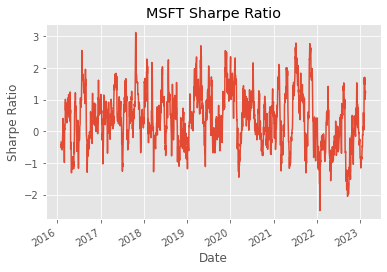

In [9]:
ticker = "MSFT"
rolling_sharpe(ticker=ticker)